In [8]:
#Iris dataset

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [9]:
df=sns.load_dataset('iris')
print("Shape is : ",df.shape)
df.head()

Shape is :  (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


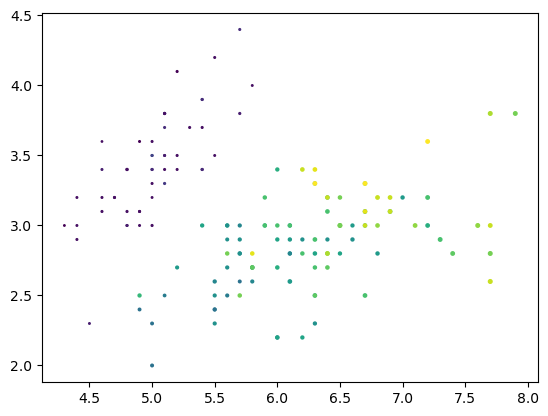

In [10]:
plt.scatter(df['sepal_length'],df['sepal_width'],df['petal_length'],df['petal_width'])

In [11]:
a=df.iloc[:,0:4]
print(a)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [12]:
b = df.iloc[:,-1]
print(b)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [13]:
from sklearn.cluster import KMeans
wcss1=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(a)
    wcss1.append(km.inertia_)
wcss1

[681.3706,
 152.3479517603579,
 142.7540625,
 57.25600931571816,
 46.6927,
 45.56901650432901,
 37.32276502386503,
 33.64912747162747,
 28.015974310776947,
 27.512588679251607]

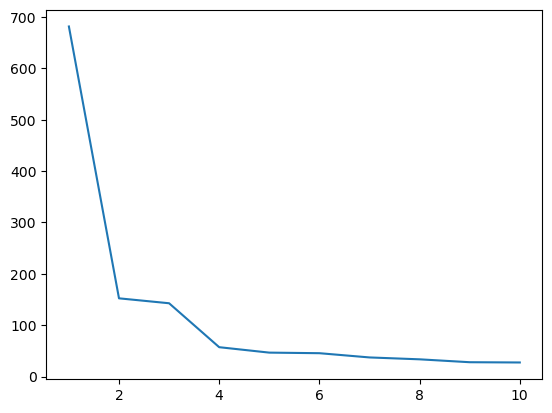

In [14]:
plt.plot(range(1,11),wcss1)

In [15]:
# x=df.iloc[:,:]
km=KMeans(n_clusters=4)
y_mean=km.fit_predict(a)
y_mean

array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

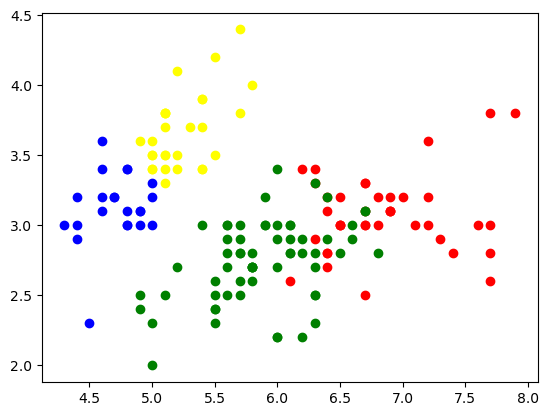

In [16]:
# a.iloc[y_mean==3,1]

plt.scatter(a.iloc[y_mean == 0, 0], a.iloc[y_mean == 0, 1], color='blue')
plt.scatter(a.iloc[y_mean == 1, 0], a.iloc[y_mean == 1, 1], color='red')
plt.scatter(a.iloc[y_mean == 2, 0], a.iloc[y_mean == 2, 1], color='green')
plt.scatter(a.iloc[y_mean == 3, 0], a.iloc[y_mean == 3, 1], color='yellow')
plt.show()

Shape is :  (150, 5)
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


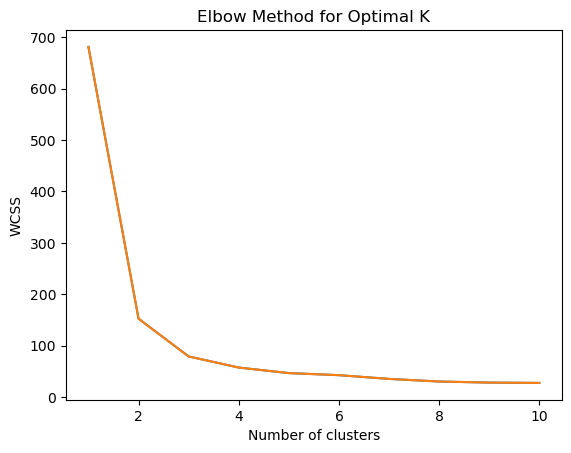

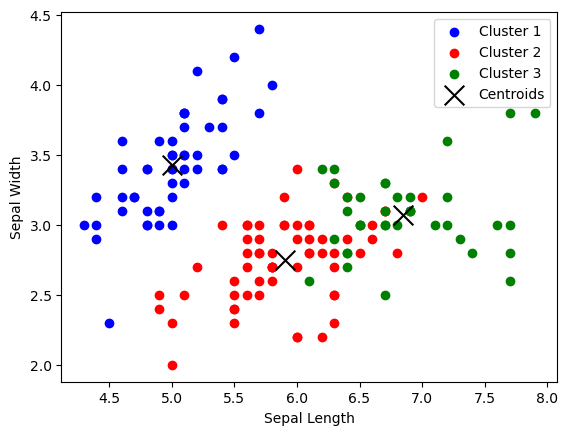

In [20]:
#OTHER WAY

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Load the Iris dataset
df = sns.load_dataset('iris')
print("Shape is : ", df.shape)
df.head()

# Features for clustering (sepal_length, sepal_width, petal_length, petal_width)
a = df.iloc[:, 0:4]  # Select first 4 columns (features)
print(a.head())

# Elbow Method for optimal clusters
wcss1 = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit_predict(a)
    wcss1.append(km.inertia_)

plt.plot(range(1,11),wcss1)

# Plot the Elbow method to find the optimal number of clusters
plt.plot(range(1, 11), wcss1)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Means Clustering with 3 clusters (based on elbow plot)
km = KMeans(n_clusters=3)
y_mean = km.fit_predict(a)

# Visualize clusters
plt.scatter(a.iloc[y_mean == 0, 0], a.iloc[y_mean == 0, 1], color='blue', label='Cluster 1')
plt.scatter(a.iloc[y_mean == 1, 0], a.iloc[y_mean == 1, 1], color='red', label='Cluster 2')
plt.scatter(a.iloc[y_mean == 2, 0], a.iloc[y_mean == 2, 1], color='green', label='Cluster 3')

# Plot centroids (K-Means centers)
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200, label='Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
